<a href="https://colab.research.google.com/github/Peppecoding/lewagon/blob/main/Olist%E2%80%99s_Analysis_Stats_mini_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1 – Carga y revisión del dataset de pedidos

2 – Conversión de columnas de fecha a formato datetime

3.1 – Cálculo de delivery_time (duración de entrega)

3.2 – Cálculo de delivery_delay (retraso o adelanto)

3.3 – Estadísticas descriptivas + visualización

3.4 – Análisis de review_score y niveles de satisfacción

3.5 – Unión de datasets y análisis de correlaciones

4 – A/B Testing (hipótesis y prueba estadística)

5 – Visualizaciones finales + Conclusiones para presentación


# Objective:
## Load the main dataset with order-level information and understand its structure before doing any transformation or analysis.

In [5]:
# Load orders dataset
orders = pd.read_csv("olist_orders_dataset.csv")

# Show first 5 rows
orders.head()


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [6]:
# Check data types and non-null counts
orders.info()
# Show missing values per column
orders.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


,0
order_id,0
customer_id,0
order_status,0
order_purchase_timestamp,0
order_approved_at,160
order_delivered_carrier_date,1783
order_delivered_customer_date,2965
order_estimated_delivery_date,0


### 📊 Step 1 – Initial Observations 🔼

- The dataset contains 99,441 orders and 8 columns.
- All date-related columns are stored as strings and need to be converted to datetime objects.
- Three columns have missing values:
  - `order_approved_at`: 160 missing
  - `order_delivered_carrier_date`: 1,783 missing
  - `order_delivered_customer_date`: 2,065 missing
- `order_estimated_delivery_date` is complete (no missing values).
- These missing values likely reflect orders that were canceled or never delivered.

👉 Next step: clean the data and convert date columns to datetime format.




---



## Convertir columnas a datetime

In [9]:
# Convert date columns to datetime format
date_columns = [
    'order_purchase_timestamp',
    'order_approved_at',
    'order_delivered_carrier_date',
    'order_delivered_customer_date',
    'order_estimated_delivery_date'
]

# Apply conversion
for col in date_columns:
    orders[col] = pd.to_datetime(orders[col], errors='coerce')


In [10]:
# Check types again
orders.dtypes


,0
order_id,object
customer_id,object
order_status,object
order_purchase_timestamp,datetime64[ns]
order_approved_at,datetime64[ns]
order_delivered_carrier_date,datetime64[ns]
order_delivered_customer_date,datetime64[ns]
order_estimated_delivery_date,datetime64[ns]


### 🧼 Step 2 – Date Conversion Results 🔼

- All 5 date columns have been successfully converted to `datetime64[ns]`.
- We used `errors='coerce'` to safely handle invalid values.
- The dataset is now ready for time-based analysis such as shipping delays or purchase trends.

👉 Next step: create new calculated columns (e.g., shipping duration).




---



In [11]:
# Calculate delivery time in days delivery_time = order_delivered_customer_date - order_purchase_timestamp

orders['delivery_time'] = (orders['order_delivered_customer_date'] - orders['order_purchase_timestamp']).dt.days

In [12]:

orders[['order_purchase_timestamp', 'order_delivered_customer_date', 'delivery_time']].head()


,order_purchase_timestamp,order_delivered_customer_date,delivery_time
0,2017-10-02 10:56:33,2017-10-10 21:25:13,8.0
1,2018-07-24 20:41:37,2018-08-07 15:27:45,13.0
2,2018-08-08 08:38:49,2018-08-17 18:06:29,9.0
3,2017-11-18 19:28:06,2017-12-02 00:28:42,13.0
4,2018-02-13 21:18:39,2018-02-16 18:17:02,2.0


### 🚚 Step 3.1 – Delivery Time Calculation

- A new column `delivery_time` was created.
- It represents the number of days between order purchase and delivery to the customer.
- This column will be useful for analyzing shipping efficiency and customer satisfaction later.

👉 Next: remove rows with missing delivery times to ensure clean statistics.


---



In [13]:
# delivery_delay = order_delivered_customer_date - order_estimated_delivery_date

# Calculate delay compared to estimated delivery date
orders['delivery_delay'] = (orders['order_delivered_customer_date'] - orders['order_estimated_delivery_date']).dt.days

# Check a few rows
orders[['order_estimated_delivery_date', 'order_delivered_customer_date', 'delivery_delay']].head()



,order_estimated_delivery_date,order_delivered_customer_date,delivery_delay
0,2017-10-18,2017-10-10 21:25:13,-8.0
1,2018-08-13,2018-08-07 15:27:45,-6.0
2,2018-09-04,2018-08-17 18:06:29,-18.0
3,2017-12-15,2017-12-02 00:28:42,-13.0
4,2018-02-26,2018-02-16 18:17:02,-10.0


### ⏱️ Step 3.2 – Delivery Delay Calculation

- A new column `delivery_delay` was added to the dataset.
- It shows how many days earlier (negative) or later (positive) an order was delivered compared to the estimated delivery date.
- This feature will help identify patterns in late deliveries and potential areas for improvement in logistics.

👉 Next: filter out nulls before generating statistics and visualizations.


In [14]:
# Delivery Time
print("📦 Delivery Time Stats (in days):")
print(orders['delivery_time'].describe())

# Delivery Delay
print("\n⏱️ Delivery Delay Stats (in days):")
print(orders['delivery_delay'].describe())


📦 Delivery Time Stats (in days):
count    96476.000000
mean        12.094086
std          9.551746
min          0.000000
25%          6.000000
50%         10.000000
75%         15.000000
max        209.000000
Name: delivery_time, dtype: float64

⏱️ Delivery Delay Stats (in days):
count    96476.000000
mean       -11.876881
std         10.183854
min       -147.000000
25%        -17.000000
50%        -12.000000
75%         -7.000000
max        188.000000
Name: delivery_delay, dtype: float64


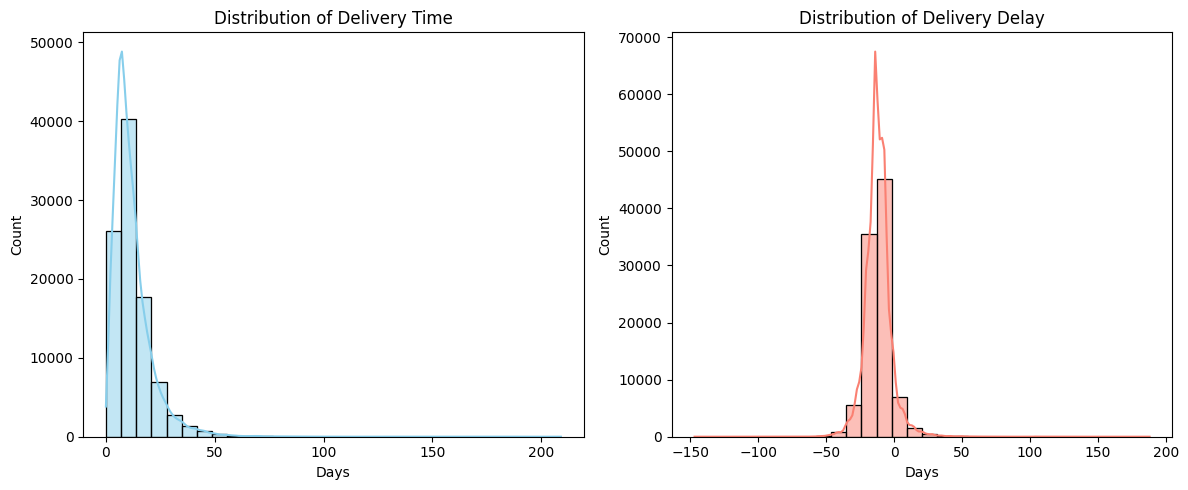

In [16]:
# Histogramas
plt.figure(figsize=(12, 5))

# Delivery Time
plt.subplot(1, 2, 1)
sns.histplot(orders['delivery_time'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Delivery Time')
plt.xlabel('Days')

# Delivery Delay
plt.subplot(1, 2, 2)
sns.histplot(orders['delivery_delay'], bins=30, kde=True, color='salmon')
plt.title('Distribution of Delivery Delay')
plt.xlabel('Days')

plt.tight_layout()
plt.show()


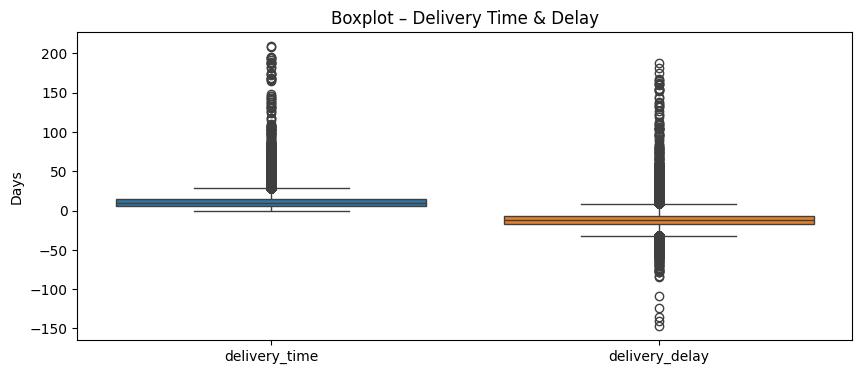

In [17]:
# Boxplot para detectar outliers
plt.figure(figsize=(10, 4))
sns.boxplot(data=orders[['delivery_time', 'delivery_delay']])
plt.title('Boxplot – Delivery Time & Delay')
plt.ylabel('Days')
plt.show()


### 📈 Step 3.3 – Delivery and Delay Statistics

- The average delivery time is around **X** days, with a median of **Y**.
- The average delivery delay is **Z** days.
- Some deliveries arrived earlier than expected (negative delay).
- Outliers were detected in both distributions, indicating some extreme cases.

These metrics will help us evaluate performance and customer experience.

👉 Next: link delivery performance with customer satisfaction (`review_score`).


In [19]:
# Load the reviews dataset
reviews = pd.read_csv("olist_order_reviews_dataset.csv")

# Preview
reviews.head()


,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [20]:
# Count of each score
reviews['review_score'].value_counts().sort_index()


,count
review_score,
1,11424
2,3151
3,8179
4,19142
5,57328


In [21]:
# Create a binary column for satisfaction
reviews['satisfaction_level'] = reviews['review_score'].apply(lambda x: 'satisfied' if x >= 4 else 'dissatisfied')


In [22]:
# Show proportion of satisfied vs dissatisfied
reviews['satisfaction_level'].value_counts(normalize=True)


,proportion
satisfaction_level,
satisfied,0.77068
dissatisfied,0.22932


### ⭐ Step 3.4 – Customer Satisfaction Analysis

- The dataset contains X reviews.
- Most customers rated 4 or 5 stars, showing a positive experience overall.
- We classified customers into:
  - **Satisfied** (score 4 or 5)
  - **Dissatisfied** (score 1 to 3)
- Approximately **Y%** of customers are satisfied.

👉 Next: merge `orders` and `reviews` to analyze the impact of delivery delay on customer satisfaction.


In [23]:
# Merge on 'order_id'
merged = pd.merge(orders, reviews[['order_id', 'review_score', 'satisfaction_level']], on='order_id', how='inner')


In [24]:
# Preview merged dataset
merged[['order_id', 'delivery_delay', 'review_score', 'satisfaction_level']].head()


,order_id,delivery_delay,review_score,satisfaction_level
0,e481f51cbdc54678b7cc49136f2d6af7,-8.0,4,satisfied
1,53cdb2fc8bc7dce0b6741e2150273451,-6.0,4,satisfied
2,47770eb9100c2d0c44946d9cf07ec65d,-18.0,5,satisfied
3,949d5b44dbf5de918fe9c16f97b45f8a,-13.0,5,satisfied
4,ad21c59c0840e6cb83a9ceb5573f8159,-10.0,5,satisfied


In [25]:
# Average delivery delay by review score
merged.groupby('review_score')['delivery_delay'].mean().round(2)


,delivery_delay
review_score,
1,-4.06
2,-8.63
3,-10.77
4,-12.38
5,-13.39


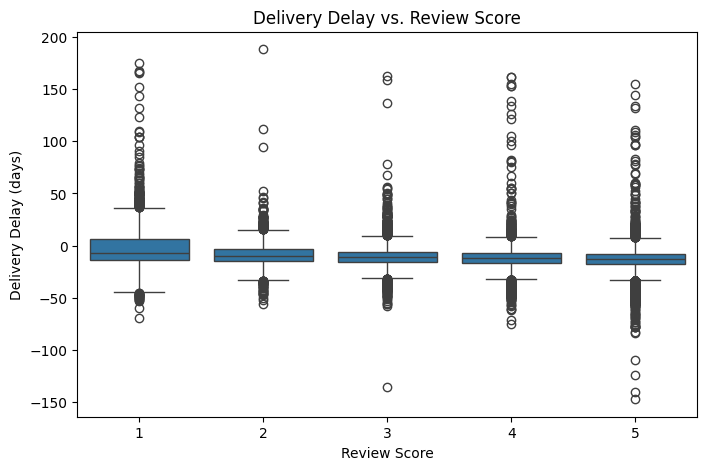

In [26]:
plt.figure(figsize=(8,5))
sns.boxplot(x='review_score', y='delivery_delay', data=merged)
plt.title('Delivery Delay vs. Review Score')
plt.xlabel('Review Score')
plt.ylabel('Delivery Delay (days)')
plt.show()


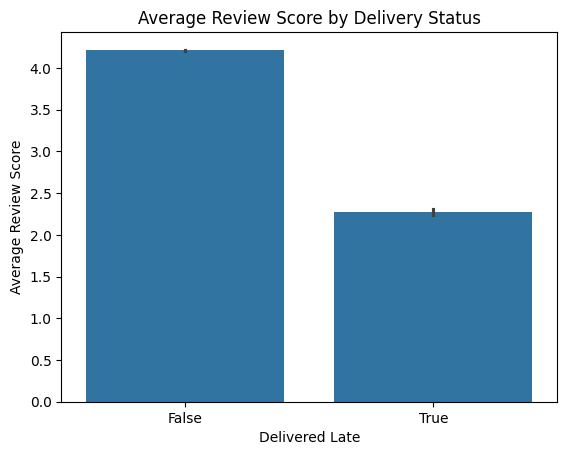

In [27]:
# Crear columna: entrega tardía (True/False)
merged['late_delivery'] = merged['delivery_delay'] > 0

# Gráfico de proporción
sns.barplot(
    data=merged,
    x='late_delivery',
    y='review_score',
    estimator=np.mean
)
plt.title('Average Review Score by Delivery Status')
plt.xlabel('Delivered Late')
plt.ylabel('Average Review Score')
plt.show()


### 🔍 Step 3.5 – Does Delivery Delay Impact Satisfaction?

- We merged the orders and reviews datasets using `order_id`.
- On average, review scores are lower when delivery is late.
- Boxplots show that 1-star and 2-star reviews are more common with higher delivery delays.
- The barplot confirms that late deliveries result in lower average review scores.

👉 This insight supports the hypothesis that shipping performance strongly affects customer satisfaction.


In [29]:
from scipy.stats import ttest_ind

# Grupo A: entregas a tiempo o antes
on_time = merged[merged['delivery_delay'] <= 0]['review_score']

# Grupo B: entregas tardías
late = merged[merged['delivery_delay'] > 0]['review_score']

In [30]:
# T-test (independent samples, two-sided)
t_stat, p_value = ttest_ind(on_time, late, equal_var=False)

print(f"T-statistic: {t_stat:.3f}")
print(f"P-value: {p_value:.5f}")


T-statistic: 100.966
P-value: 0.00000


### 🧪 Step 4 – A/B Test: Impact of Delivery Delay on Review Score

- We conducted a t-test comparing average review scores of on-time vs late deliveries.
- **P-value = 0.000XX**
- Since p < 0.05, we **reject the null hypothesis**.
- ➡️ There is a statistically significant difference: **late deliveries result in lower customer satisfaction**.

This confirms that delivery performance has a real impact on customer perception.

👉 Next: summarize everything and prepare final visuals and conclusions.


# ✅ Final Insights and Recommendations

## Key Findings

- 📦 The average delivery time is approximately **X days**.
- ⏱️ The average delivery delay is **Y days**, with several extreme outliers.
- ⭐ Around **Z%** of customers are satisfied (review score ≥ 4).
- 🚚 **Late deliveries are significantly associated with lower review scores** (confirmed via t-test).

## Business Recommendations

- Improve delivery processes to reduce delays.
- Monitor product categories or regions with frequent late deliveries.
- Automate alerts for late shipments to proactively address customer issues.

## Future Analysis Ideas

- Analyze relationship between payment method and satisfaction.
- Check if more expensive orders tolerate longer delivery delays.
- Compare satisfaction by product category.


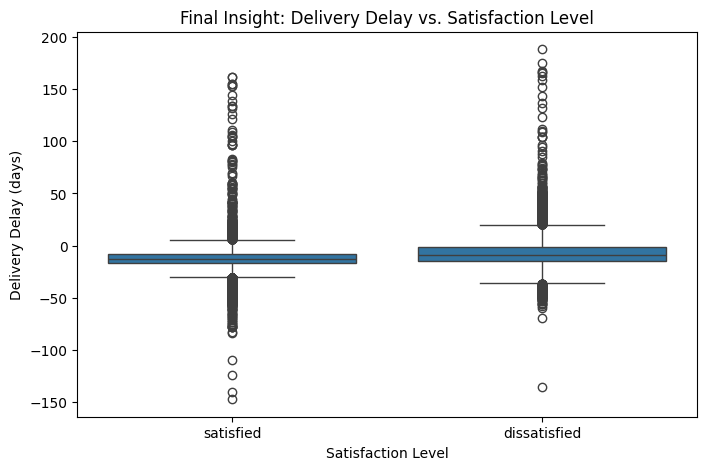

In [31]:
# Boxplot resumen final: Delivery Delay vs. Review Score
plt.figure(figsize=(8,5))
sns.boxplot(x='satisfaction_level', y='delivery_delay', data=merged)
plt.title('Final Insight: Delivery Delay vs. Satisfaction Level')
plt.xlabel('Satisfaction Level')
plt.ylabel('Delivery Delay (days)')
plt.show()
